# Boston Airbnb Data

To obtain the Boston Airbnb open dataset, please click [here](https://www.kaggle.com/datasets/airbnb/boston) and you will be redirected to Kaggle.

First, we will import the dtaset along with the required libraries to process and analyze the data. The dataset contains three tables which we will import in order to understand the available data.

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Import the three available tables (calendar, listings and reviews)
calendar_df = pd.read_csv('./boston_airbnb/calendar.csv')
listings_df = pd.read_csv('./boston_airbnb/listings.csv')
reviews_df = pd.read_csv('./boston_airbnb/reviews.csv')

Once we imported the tables as dataframes using Pandas, let's explore what columns are available on each. For this purpose, we will use the .head() method. For the *listings* dataframe, we will use a different method given the number of columns

In [6]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [8]:
for column in listings_df.columns:
    print(column)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

## Which are the neighbourhoods offering more rental places?

To answer this first question, we can simply count the number of ids per neighbourhood by subsettind the listings dataframe. We will use the .groupby() method to perform this action.

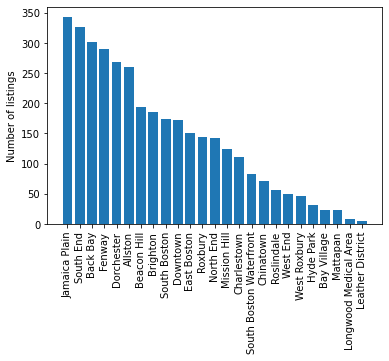

In [11]:
#Count the number of listings per neighbourhood
listings_locations = listings_df[['id','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').count()
listings_locations = listings_locations.sort_values(by='id', ascending=False)

#Plot our findings
plt.bar(listings_locations.index,listings_locations['id'])
plt.xticks(listings_locations.index, rotation='vertical')
plt.ylabel('Number of listings')
plt.show()